In [40]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.bellhop import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00260.nc
Uses the following time : 0
The transect will contain 216 horizontal points


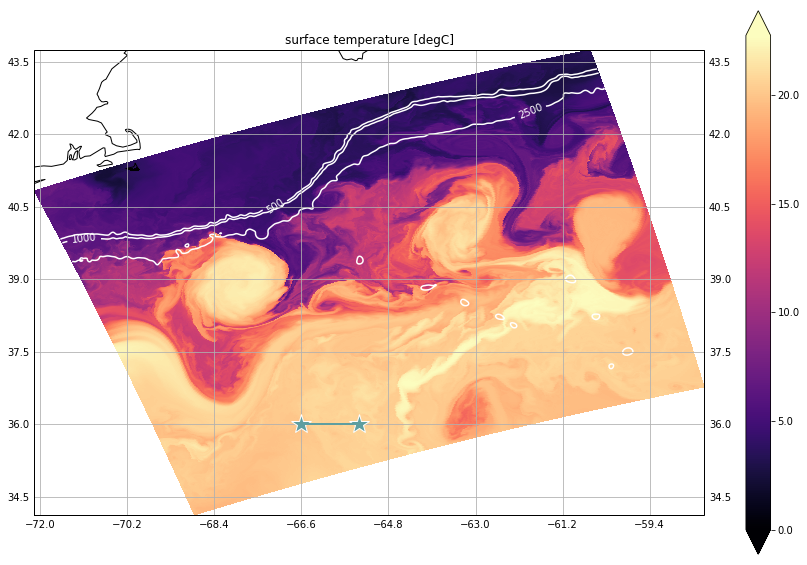

In [2]:
s = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'file':10, 'itime':0, 
                    'lon': [-66.6,-65.4], 'lat': [36.,36.], 'plot_map': True, 'contour':True}}, zmax = 4900)

In [4]:
r = s.SSP['gs']['s']              # range (m)
depth = s.SSP['gs']['depth'][:]   # depth (m)
c = s.SSP['gs']['c']              # celerity (m/s)
print('Number of values for each profile :', c.shape[1])
print('Number of celerity profiles :', c.shape[0])
print('Maximum range : %.1fkm' %(np.max(r)/1000.))

Number of values for each profile : 50
Number of celerity profiles : 216
Maximum range : 107.8km


In [5]:
# Generate .env file A
issp=0                                # sound speed profile number

s.params['hypothesis'] = 'QVWT'       # Q for quadrilateral SSP interpolation (SSP2D)
s.params['file_type'] = 'A'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-89.0, 89.0]  # limit angles

s.params['NDepth'] = 51               # number of receiver depths
s.params['zmin'] = 0.                 # minimum depth (m)
s.params['zmax'] = 500.               # maximum depth (m) (unuseful if NDepth=1)
                 
s.params['NRange'] = 101              # number of receiver range    
s.params['rmin'] = 0.                 # minimum range (km)
s.params['rmax'] = 100.               # maximum range (km) (unuseful if NRange=1)            

s.params['zbox'] = 5000.              # box depth limit 
s.params['rbox'] = 101.               # box range limit 

s.generate_envfile('gs',file_env = 'test_s.env', Issp=issp, SSP_depth_step=1)
s.generate_sspfile('gs', file_env='test_s.env', SSP_depth_step=1)

Output file is : test_s.ssp


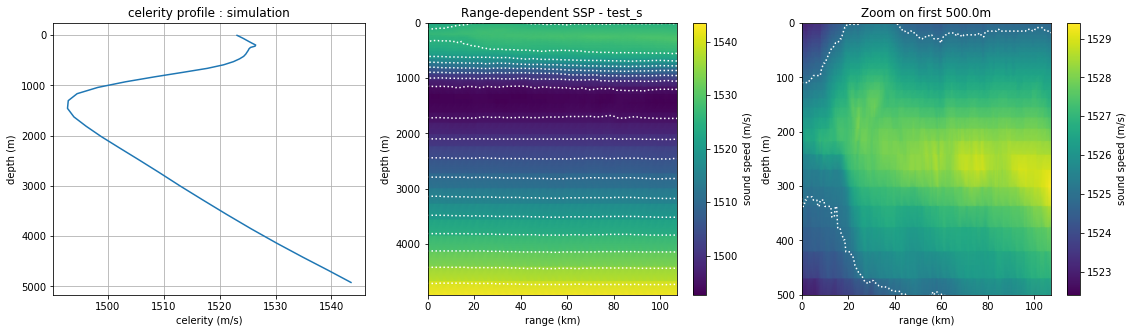

In [6]:
plt.figure(figsize=(19,5))
plt.subplot(131)
s.plotssp ('gs', Issp=0, zoom=False)
plt.subplot(132)
s.plotssp2D('test_s.ssp')
plt.subplot(133)
s.plotssp2D('test_s.ssp', zoom = 550.)
plt.show()

---
---
---
# 10h plus tard ...

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00260.nc
Uses the following time : 10
The transect will contain 216 horizontal points


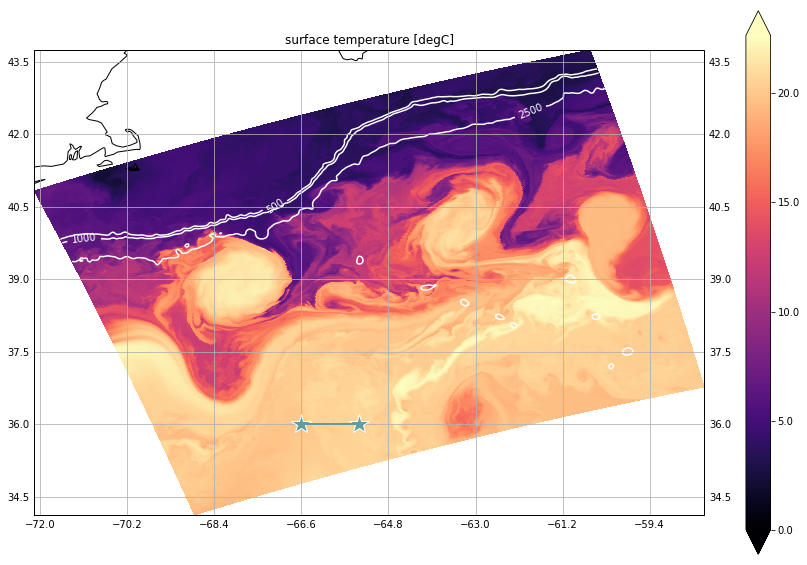

In [7]:
s1 = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'file':10, 'itime':10, 
                    'lon': [-66.6,-65.4], 'lat': [36.,36.], 'plot_map': True, 'contour':True}}, zmax = 4900)

In [8]:
r1 = s1.SSP['gs']['s']              # range (m)
depth1 = s1.SSP['gs']['depth'][:]   # depth (m)
c1 = s1.SSP['gs']['c']              # celerity (m/s)
print('Number of values for each profile :', c1.shape[1])
print('Number of celerity profiles :', c1.shape[0])
print('Maximum range : %.1fkm' %(np.max(r1)/1000.))

Number of values for each profile : 50
Number of celerity profiles : 216
Maximum range : 107.8km


In [9]:
# Generate .env file A
issp=0                                # sound speed profile number

s1.params['hypothesis'] = 'QVWT'       # Q for quadrilateral SSP interpolation (SSP2D)
s1.params['file_type'] = 'A'           # 'E' : eigen rays (.rau) / 'A' : arrivals time and amplitude file (.arr)
s1.params['zs'] = 100.                 # source depth
s1.params['ALimites'] = [-89.0, 89.0]  # limit angles

s1.params['NDepth'] = 51               # number of receiver depths
s1.params['zmin'] = 0.                 # minimum depth (m)
s1.params['zmax'] = 500.               # maximum depth (m) (unuseful if NDepth=1)
                 
s1.params['NRange'] = 101              # number of receiver range    
s1.params['rmin'] = 0.                 # minimum range (km)
s1.params['rmax'] = 100.               # maximum range (km) (unuseful if NRange=1)            

s1.params['zbox'] = 5000.              # box depth limit 
s1.params['rbox'] = 101.               # box range limit 

s1.generate_envfile('gs',file_env = 'test_s1.env', Issp=issp, SSP_depth_step=1)
s1.generate_sspfile('gs', file_env='test_s1.env', SSP_depth_step=1)

Output file is : test_s1.ssp


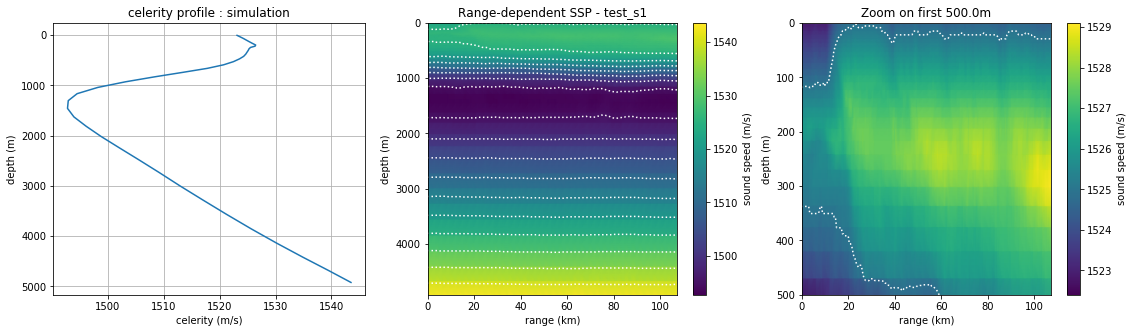

In [10]:
plt.figure(figsize=(19,5))
plt.subplot(131)
s.plotssp ('gs', Issp=0, zoom=False)
plt.subplot(132)
s.plotssp2D('test_s1.ssp')
plt.subplot(133)
s.plotssp2D('test_s1.ssp', zoom = 550.)
plt.show()

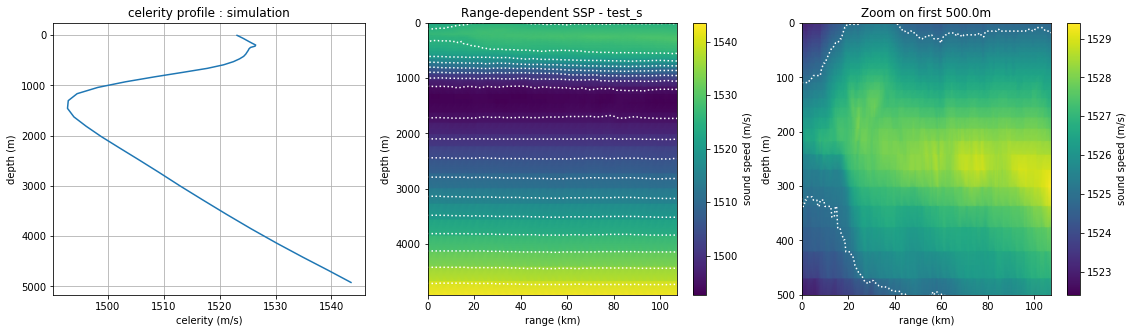

In [23]:
plt.figure(figsize=(19,5))
plt.subplot(131)
s.plotssp ('gs', Issp=0, zoom=False)
plt.subplot(132)
s.plotssp2D('test_s.ssp')
plt.subplot(133)
s.plotssp2D('test_s.ssp', zoom = 550.)
plt.show()

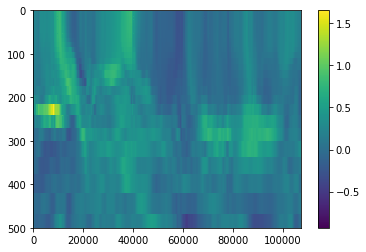

In [30]:
plt.pcolormesh(r[:-1], depth, (c-c1).T)
plt.colorbar()
plt.ylim([0,500])
plt.gca().invert_yaxis()

In [16]:
n = c.shape[0]-1

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
-- Grid object
dim lon_rho: 1602  2002
lon_rho min= -72.123, max=-58.273
lat_rho min= 34.123, max=43.734
h min= 20.000, max=5543.070
Uses the following output file: /home/datawork-lops-osi/jgula/NESED/nesed_avg.00260.nc
Uses the following time : 10


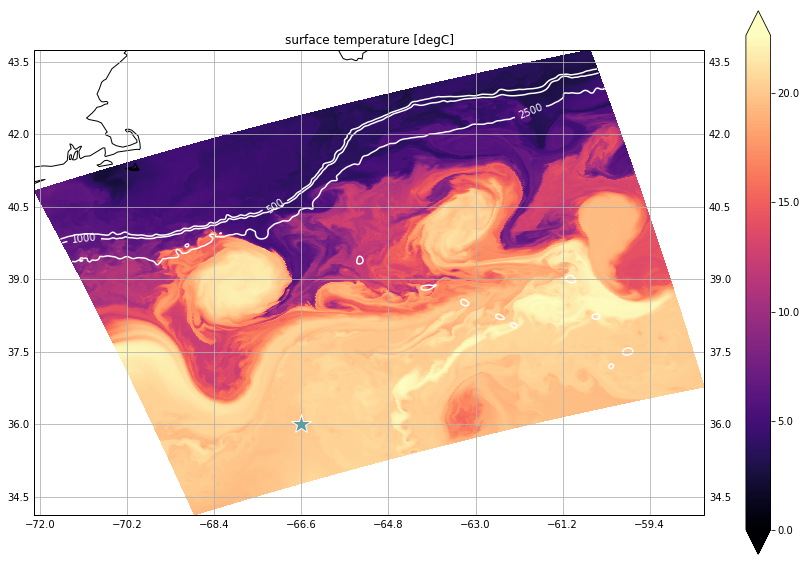

In [45]:
g = bellhop({'gs': {'datadir': '/home/datawork-lops-osi/jgula/NESED/', 'file':10, 'itime':10, 
                    'lon': -66.6, 'lat': 36., 'plot_map': True, 'contour':True}}, zmax = 4900)

In [46]:
g.generate_btyfile(file_env = 'test11.env', bathy=4500.)

In [48]:
Arr, Pos = s.read_arrivals_asc ('../TESTS/4_time0.arr', Narrmx = 526)

Max.number of arrivals for source index 0 is 525


In [49]:
Nsd = np.shape(Pos['s']['depth'])[0]
Nrd = np.shape(Pos['r']['depth'])[0]
Nrr = np.shape(Pos['r']['range'])[0]

print('Number of source depths   : Nsd = ', Nsd)
print('Number of receiver depths : Nrd = ', Nrd)
print('Number of receiver ranges : Nrr = ', Nrr)

print ('\nTotal number of receivers : ', Nrr*Nrd)

Number of source depths   : Nsd =  1
Number of receiver depths : Nrd =  51
Number of receiver ranges : Nrr =  101

Total number of receivers :  5151


In [50]:
### sonar equation
SL = 185                 # Souce level (dB)
NL = 81.7                # Noise level (dB)
DI = 0                   # Directivity index (dB)
B = 200                  # bandwidth (Hz)
T = 1                    # transmitted signal duration (s)
PG = 10.0*np.log10(B*T)  # Processing gain (dB)

#RT  = SL - TL - NL + DI + PG 
seuil_d = 10.

In [51]:
# Create time table from bellhop output data. Based on detection treshold method.
def time_table (Arr) :
    T = np.zeros( (Nrr, Nrd, Nsd) )
    for isd1 in range (Nsd):
        for ird1 in range (Nrd) : 
            for irr1 in range (Nrr) :
                Narr = int(Arr['Narr'][irr1, ird1, isd1])
                if not Narr ==0 :
                    A = abs(Arr['A'][irr1, :Narr, ird1, isd1])  # amplitude 
                    TL = - 20.0*np.log10(A)
                    RL = SL - TL - NL +DI + PG    # received level 
                    t = Arr['delay'][irr1, :Narr, ird1, isd1]
                    t_ok = t[np.where(RL > seuil_d)]

                    if len(t_ok > 0): 
                        t_min = np.min(t_ok)
                        T[irr1,ird1,isd1] = t_min  
                    else : 
                        T[irr1,ird1,isd1] = np.NaN
                else : 
                    T[irr1,ird1,isd1] = np.NaN
    return (T)

In [52]:
T_true = time_table(Arr)

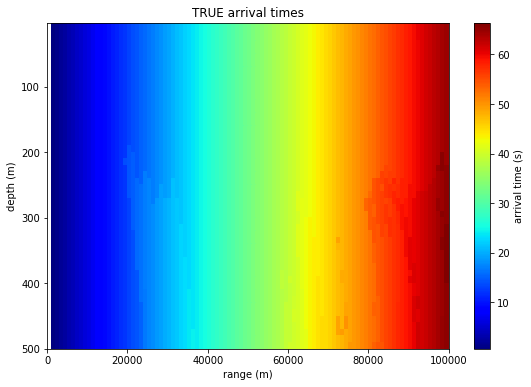

In [53]:
isd = 0    # source number (only 1 source here)
R = Pos['r']['range']
Z = Pos['r']['depth']
plt.figure(figsize=(9,6))
plt.pcolormesh(R, Z, T_true[:,:,isd].T, cmap='jet')
plt.title ('TRUE arrival times')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("arrival time (s)")
plt.gca().invert_yaxis()

In [63]:
Arr10, Pos10 = s.read_arrivals_asc ('../TESTS/4_time0_10km.arr', Narrmx = 133)

Max.number of arrivals for source index 0 is 132


In [64]:
T_10 = time_table(Arr10)

In [65]:
diff = T_true - T_10
celerity = 1500. 
dx = diff * celerity

dx < 10m : 72.4%
10m < dx < 50m : 3.9%
dx > 50m : 22.7%


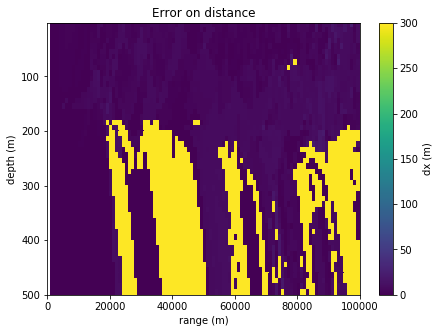

In [66]:
# dx table
plt.figure(figsize=(7,5))
plt.pcolormesh(R, Z, abs(dx[:,:,isd]).T) #, cmap='jet')
plt.title ('Error on distance')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("dx (m)")
plt.clim([0,300])
plt.gca().invert_yaxis()

# Pourcents
tot = dx.shape[0]*dx.shape[1]
under10 = np.where(abs(dx) <10.)[0].shape[0]
under50 = np.where(np.logical_and(abs(dx) >=10., abs(dx) < 50.))[0].shape[0]
over50  = np.where(abs(dx) >= 50.)[0].shape[0]
print ('dx < 10m : %.1f' %(under10/tot*100.) + '%')
print ('10m < dx < 50m : %.1f' %(under50/tot*100.) + '%')
print ('dx > 50m : %.1f' %(over50/tot*100.) + '%')

---
----
---
---
# Différence de temps d'arrivée entre step = auto (500m) et 10m 

In [87]:
Arr_t, Pos_t = s.read_arrivals_asc ('../TESTS/test1.arr', Narrmx = 522)

Max.number of arrivals for source index 0 is 521


In [88]:
T_test= time_table(Arr_t)

In [89]:
diff = T_true - T_test
celerity = 1500. 
dx = diff * celerity

dt < 2ms : 79.4%
2ms < dt < 10ms : 14.7%
dt > 10ms : 4.9%


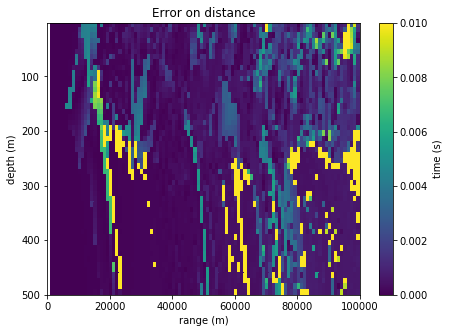

In [92]:
# dx table
plt.figure(figsize=(7,5))
plt.pcolormesh(R, Z, abs(diff[:,:,isd]).T) #, cmap='jet')
plt.title ('Error on distance')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("time (s)")
plt.clim([0,0.01])
plt.gca().invert_yaxis()

# Pourcents
tot = diff.shape[0]*diff.shape[1]
under10 = np.where(abs(diff) <0.002)[0].shape[0]
under50 = np.where(np.logical_and(abs(diff) >=0.002, abs(diff) < 0.01))[0].shape[0]
over50  = np.where(abs(diff) >= 0.01)[0].shape[0]
print ('dt < 2ms : %.1f' %(under10/tot*100.) + '%')
print ('2ms < dt < 10ms : %.1f' %(under50/tot*100.) + '%')
print ('dt > 10ms : %.1f' %(over50/tot*100.) + '%')


---
---
# Différence de temps d'arrivée entre step = 10m et 1m 

In [75]:
Arr_t0, Pos_t0 = s.read_arrivals_asc ('../TESTS/test0.arr', Narrmx = 522)

Max.number of arrivals for source index 0 is 522


In [78]:
T_test0= time_table(Arr_t0)
diff0 = T_test - T_test0

dt < 2ms : 94.0%
2ms < dt < 10ms : 2.6%
dt > 10ms : 0.6%


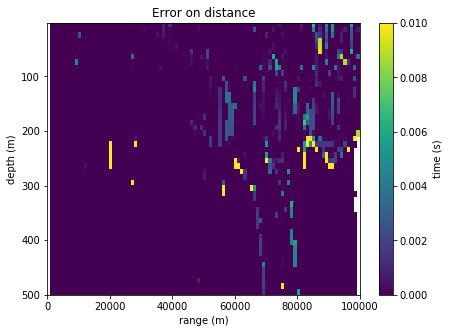

In [91]:
# dx table
plt.figure(figsize=(7,5))
plt.pcolormesh(R, Z, abs(diff0[:,:,isd]).T) #, cmap='jet')
plt.title ('Error on distance')
plt.xlabel("range (m)")
plt.ylabel("depth (m)")
cbar = plt.colorbar()
cbar.set_label("time (s)")
plt.clim([0,0.01])
plt.gca().invert_yaxis()

# Pourcents
tot = diff0.shape[0]*diff0.shape[1]
under10 = np.where(abs(diff0) <0.002)[0].shape[0]
under50 = np.where(np.logical_and(abs(diff0) >=0.002, abs(diff0) < 0.01))[0].shape[0]
over50  = np.where(abs(diff0) >= 0.01)[0].shape[0]
print ('dt < 2ms : %.1f' %(under10/tot*100.) + '%')
print ('2ms < dt < 10ms : %.1f' %(under50/tot*100.) + '%')
print ('dt > 10ms : %.1f' %(over50/tot*100.) + '%')